<h1>20. Условная оптимизация. Метод штрафных функций</h1>
Рассмотрим один из многочисленных вариантов метода штрафных функций. Задача условной оптимизации$$
   f(x) \to \min
$$при ограничениях$$
g_1(x) = 0, \dots, g_m(x) = 0, \quad
h_1(x) \le 0, \dots, h_p(x) \le 0
$$решается при помощи решения последовательности вспомогательных задач безусловной оптимизации:$$
\left(F(x) + c\sum_{i=1}^m g(h_i)^2 + c\sum_{k=1}^p \left[ h(h_k) \right]_+^2\right) \to \min,
$$где $c$ – некоторая возрастающая последовательность (например, геометрическая прогрессия), $[\alpha]_+ = \max\{0,\,\alpha\}$.

Реализуйте данный метод. Для решения задачи безусловной оптимизации воспользуйтесь функциями из библиотеки SciPy.

Проиллюстрируйте работу метода на двумерной и многомерных функциях Розенброка$$
f(x_1,x_2,\dots,x_n) = \sum_{i=1}^{n-1} \left(  (1-x_i)^2+ 100 (x_{i+1} - x_i^2 )^2 \right) 
$$с линейными и квадратичными ограничениями. Для $n=2$ изобразите найденные точки минимума на каждой итерации.

In [3]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

from scipy.optimize import minimize

<h2>Устанавливаем коэффициенты: </h2>
<ul>
    <li>x_c - начальная точка</li> 
    <li>i - кол-во итераций цикла</li> 
    <li>r - параметр, значения которого убывают с каждой итерации</li> 
    <li>b - коэффициент, насколько убывает r с каждой итерацией</li>
    <li>eps - константа для остановки</li> 
</ul>

In [9]:
x_c = [0.5, 0.5]
i = 1
r = 1
b = 0.2
eps = 0.0000001

<h2>Задаем функции и ограничения</h2>
<ul>
    $$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2$$<br>
    $$ x > 0 $$
    $$ y > 0 $$
</ul>

In [ ]:
curr_func = lambda x: rz(x) + r*(h_1(x)**2 + h_2(x)**2)
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2
h_1 = lambda x: (x[0] - 0)
h_2 = lambda x: (x[1] - 0)

<h2>Реализация метода штрафных функций:</h2>

4.110643169020082e-08
[0.99998784 0.99997565]
12


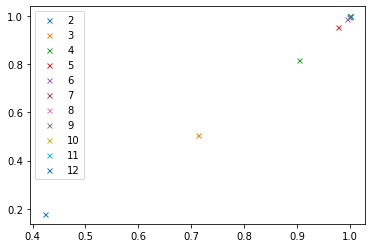

In [2]:
while i < 1000:
    if(i >= 2):
        plt.plot(x_c[0], x_c[1], 'x', markersize=5, label=i)
    if curr_func(x_c) < eps:
        break
    curr_func = lambda x: rz(x) + r*(h_1(x)**2 + h_2(x)**2)
    x_c = minimize(curr_func, x_c).x;
    i += 1
    r  *= b;   
print(curr_func(x_c))
print(x_c)
print(i)

plt.legend()
pass

In [ ]:
На графике показано минимальное значение функции на определенной итерации i

<h2>Проверка:</h2>
Проверяем точно ли нашли минимум с помочью стандартной функции minimize() из scipy.optimize для поиска минимального значения функции с ограничениями

In [3]:
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2;
h_1 = lambda x: (x[0] - 0)
h_2 = lambda x: (x[1] - 0)

x0 = [0.5, 5];
cons = ({'type': 'ineq', 'fun': h_1},
       {'type': 'ineq', 'fun': h_2},) 
minimize(rz, x0, constraints=cons)

     fun: 2.1268311531654656e-07
     jac: array([ 0.00818125, -0.00449074])
 message: 'Optimization terminated successfully'
    nfev: 125
     nit: 37
    njev: 37
  status: 0
 success: True
       x: array([0.99959722, 0.99917214])

<h2>Найдем минимум при новых ограничениях </h2>
<ul>
    $$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2$$<br>
    $$ x > 3 $$
    $$ y > 3 $$
</ul>

4.003199700812775
[2.99980001 8.99880009]
6


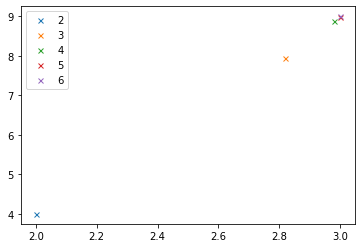

In [4]:
x_c = [1, 3]
i = 1
r = 1
b = 10
eps = 0.01
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2
h_1 = lambda x: (-x[0] + 3)
h_2 = lambda x: (-x[1] + 3)
while i < 1000:
    if(i >= 2):
        plt.plot(x_c[0], x_c[1], 'x', markersize=5, label=i)
    if r*(max(0, h_1(x_c))**2 + max(0, h_2(x_c))**2) < eps:
        break
    curr_func = lambda x: rz(x) + r*(max(0, h_1(x))**2 + max(0, h_2(x))**2)
    x_c = minimize(curr_func, x_c).x;
    i += 1
    r *= b
       
print(curr_func(x_c))
print(x_c)
print(i)

plt.legend()
pass

In [5]:
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2;
h_1 = lambda x: (x[0] - 3)
h_2 = lambda x: (x[1] - 3)

x0 = [0.5, 5];
cons = ({'type': 'ineq', 'fun': h_1},
       {'type': 'ineq', 'fun': h_2},) 
minimize(rz, x0, constraints=cons)

     fun: 4.000000000000009
     jac: array([ 4.00006503e+00, -4.17232513e-07])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([3.        , 8.99999999])

<h2>Найдем минимум при новых ограничениях </h2>
<ul>
    $$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2$$<br>
    $$ x^2 + y^2 > 4 $$
    $$ x^2 > 3 $$
</ul>

0.5358898927905523
[1.7320447  2.99997883]
7


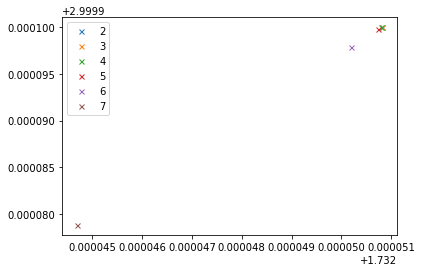

In [10]:
x_c = [2, 1]
i = 1
r = 100
b = 0.1
eps = 0.01
curr_func = lambda x: rz(x) + r*(h_1(x)**2 + h_2(x)**2)*10000000
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2
h_1 = lambda x: (x[0]**2 + x[1]**2 - 4)
h_2 = lambda x: (x[0]**2 - 3)
while i < 1000:
    if(i >= 2):
        plt.plot(x_c[0], x_c[1], 'x', markersize=5, label=i)
    if r*(max(0, h_1(x_c))**2 + max(0, h_2(x_c))**2) < eps:
        break
    curr_func = lambda x: rz(x) + r*(min(0, h_1(x))**2 + min(0, h_2(x))**2)*10000000
    x_c = minimize(curr_func, x_c).x;
    i += 1
    r  *= b;   
print(curr_func(x_c))
print(x_c)
print(i)

plt.legend()
pass

In [7]:
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2;
h_1 = lambda x: (x[0]**2 + x[1]**2 - 4)
h_2 = lambda x: (x[0]**2 - 3)

x0 = [3, 3];
cons = ({'type': 'ineq', 'fun': h_1},
       {'type': 'ineq', 'fun': h_2},) 
minimize(rz, x0, constraints=cons)

     fun: 0.5358983848778164
     jac: array([ 1.46436576e+00, -6.96033239e-05])
 message: 'Optimization terminated successfully'
    nfev: 70
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([1.73205081, 2.99999964])

0.5355790674871848
[1.73168725 2.99874071]
10


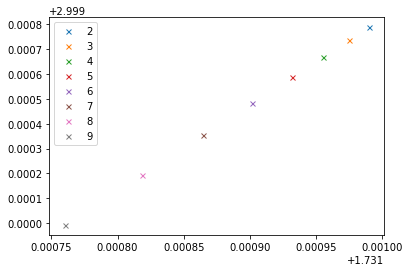

In [8]:
x_c = [1.75, 2.95]
i = 1
r = 0.01
b = 0.8
eps = 0.0001
curr_func = lambda x: rz(x) + r*(h_1(x)**2 + h_2(x)**2)*100000
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2
h_1 = lambda x: (x[0]**2 + x[1]**2 - 4)
h_2 = lambda x: (x[0]**2 - 3)
while i < 10:
    if(i >= 2):
        plt.plot(x_c[0], x_c[1], 'x', markersize=5, label=i)
    if r*(max(0, h_1(x_c))**2 + max(0, h_2(x_c))**2) < eps:
        break
    curr_func = lambda x: rz(x) + r*(min(0, h_1(x))**2 + min(0, h_2(x))**2)*100000
    x_c = minimize(curr_func, x_c).x;
    i += 1
    r  *= b;   
print(curr_func(x_c))
print(x_c)
print(i)

plt.legend()
pass

<h2>Функция с 3 переменными</h2>
<ul>
    $$f(x,y) = (1-x)^2+ 100 (y - x^2 )^2 + (1-y)^2+ 100 (z - y^2 )^2$$<br>
    $$ x^2 + y^2 > 4 $$
    $$ x^2 > 3 $$
    $$ z^2 > 3 $$
</ul>

4.496293410794326
[1.73205074 2.98019747 8.88157693]
9


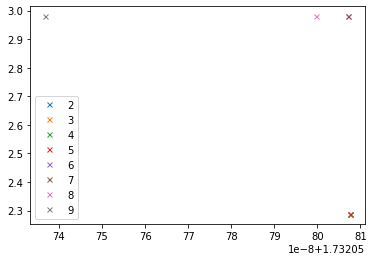

In [12]:
x_c = [2, 1, 3]
i = 1
r = 100
b = 0.1
eps = 0.01
curr_func = lambda x: rz(x) + r*(h_1(x)**2 + h_2(x)**2 + h_3(x)**2)*1000000000000
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2 + (1-x[1])**2 + 100*(x[2] - x[1]**2)**2
h_1 = lambda x: (x[0]**2 + x[1]**2 - 4)
h_2 = lambda x: (x[0]**2 - 3)
h_3 = lambda x: (x[2]**2 - 3)
while i < 1000:
    if(i >= 2):
        plt.plot(x_c[0], x_c[1], 'x', markersize=5, label=i)
    if r*(max(0, h_1(x_c))**2 + max(0, h_2(x_c))**2 + max(0, h_3(x_c))**2) < eps:
        break
    curr_func = lambda x: rz(x) + r*(min(0, h_1(x))**2 + min(0, h_2(x))**2 + min(0, h_3(x))**2)*1000000000000
    x_c = minimize(curr_func, x_c).x;
    i += 1
    r  *= b;   
print(curr_func(x_c))
print(x_c)
print(i)

plt.legend()
pass

In [8]:
rz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2 + (1-x[1])**2 + 100*(x[2] - x[1]**2)**2
h_1 = lambda x: (x[0]**2 + x[1]**2 - 4)
h_2 = lambda x: (x[0]**2 - 3)
h_3 = lambda x: (x[2]**2 - 3)

x0 = [3, 3, 3];
cons = ({'type': 'ineq', 'fun': h_1},
       {'type': 'ineq', 'fun': h_2},
       {'type': 'ineq', 'fun': h_3}) 
minimize(rz, x0, constraints=cons)

     fun: 4.496294847475259
     jac: array([ 1.51802939e+01, -7.64127374e-02,  1.29793882e-02])
 message: 'Optimization terminated successfully'
    nfev: 85
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([1.73205081, 2.98020241, 8.88167128])

<h2>Вывод:</h2>
С помощью функций вычисляющих min для функций без ограничений(реализованных в SciPy). Можно найти минимальное значение функции с ограничениями. Для этого нужно воспользоваться методом штрафных функций. Его идея состоит в том что мы вычисляем минимальное значение функции:<br>
$$F(x) = f(x) + P(x)$$
<ul>
   <li>f(x) - функция для которой нужно вычислить </li> 
   <li>P(x) - штрафная функиция, она сильно увеливает F(x), если выходит за ограничения</li> 
</ul>
Таким образом, получаеться что наименьшее значение функции F(x) принимает если f(x) - минимально и не выходит за ограничения
